In [1]:
! pip install qiskit

In [2]:
! pip install qiskit-machine-learning

In [3]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from qiskit import *

# External imports
from pylab import cm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.algorithms.optimizers import SPSA

from qiskit.circuit.library import PauliFeatureMap
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data

from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel

import random
import time
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

/tmp/ipykernel_191/3445415176.py:21: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SPSA


In [4]:
df = pd.read_csv('Thesis Android US Dataset.csv')
df.head()

,Date,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny
0,27-06-2023,08:00,27.0,32.0,21.0,87.0,3.0,1003.0,Cloudy,Cloudy,0.0,1.0,0.0
1,27-06-2023,09:00,27.0,32.0,22.0,86.0,9.0,1003.0,Cloudy,Cloudy,0.0,1.0,0.0
2,27-06-2023,10:00,28.0,34.0,23.0,90.0,3.0,1003.0,Cloudy,Rain,1.0,1.0,0.0
3,27-06-2023,11:00,28.0,33.0,30.0,85.0,9.0,1003.0,Isolated Thunderstroms,Rain,1.0,1.0,0.0
4,27-06-2023,12:00,27.0,32.0,53.0,90.0,9.0,1003.0,Rain,Sunny,0.0,0.0,0.0


In [5]:
df.drop(columns=['Date'], inplace=True)
#df.drop(columns=['Temperature(C)'], inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny
0,08:00,27.0,32.0,21.0,87.0,3.0,1003.0,Cloudy,Cloudy,0.0,1.0,0.0
1,09:00,27.0,32.0,22.0,86.0,9.0,1003.0,Cloudy,Cloudy,0.0,1.0,0.0
2,10:00,28.0,34.0,23.0,90.0,3.0,1003.0,Cloudy,Rain,1.0,1.0,0.0
3,11:00,28.0,33.0,30.0,85.0,9.0,1003.0,Isolated Thunderstroms,Rain,1.0,1.0,0.0
4,12:00,27.0,32.0,53.0,90.0,9.0,1003.0,Rain,Sunny,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3660,20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)
df

,Time,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),State,Real State,Rain,Cloudy,Sunny
0,08:00,27.0,32.0,21.0,87.0,3.0,1003.0,Cloudy,Cloudy,0.0,1.0,0.0
1,09:00,27.0,32.0,22.0,86.0,9.0,1003.0,Cloudy,Cloudy,0.0,1.0,0.0
2,10:00,28.0,34.0,23.0,90.0,3.0,1003.0,Cloudy,Rain,1.0,1.0,0.0
3,11:00,28.0,33.0,30.0,85.0,9.0,1003.0,Isolated Thunderstroms,Rain,1.0,1.0,0.0
4,12:00,27.0,32.0,53.0,90.0,9.0,1003.0,Rain,Sunny,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3407,07:00,23.0,24.0,21.0,85.0,14.0,1016.0,Cloudy,Cloudy,0.0,1.0,0.0
3408,08:00,24.0,26.0,16.0,84.0,14.0,1016.0,Cloudy,Cloudy,0.0,1.0,0.0
3409,09:00,25.0,28.0,14.0,81.0,2.0,1017.0,Fog,Cloudy,0.0,1.0,0.0
3410,10:00,26.0,29.0,8.0,79.0,6.0,1017.0,Cloudy,Cloudy,0.0,1.0,0.0


In [8]:
df.drop(columns=['Time', 'State','Real State'], inplace=True)
df

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy,Sunny
0,27.0,32.0,21.0,87.0,3.0,1003.0,0.0,1.0,0.0
1,27.0,32.0,22.0,86.0,9.0,1003.0,0.0,1.0,0.0
2,28.0,34.0,23.0,90.0,3.0,1003.0,1.0,1.0,0.0
3,28.0,33.0,30.0,85.0,9.0,1003.0,1.0,1.0,0.0
4,27.0,32.0,53.0,90.0,9.0,1003.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3407,23.0,24.0,21.0,85.0,14.0,1016.0,0.0,1.0,0.0
3408,24.0,26.0,16.0,84.0,14.0,1016.0,0.0,1.0,0.0
3409,25.0,28.0,14.0,81.0,2.0,1017.0,0.0,1.0,0.0
3410,26.0,29.0,8.0,79.0,6.0,1017.0,0.0,1.0,0.0


In [9]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df3

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy,Sunny
0,27.0,32.0,21.0,87.0,3.0,1003.0,0.0,1.0,0.0
1,27.0,32.0,22.0,86.0,9.0,1003.0,0.0,1.0,0.0
2,28.0,34.0,23.0,90.0,3.0,1003.0,1.0,1.0,0.0
3,28.0,33.0,30.0,85.0,9.0,1003.0,1.0,1.0,0.0
4,27.0,32.0,53.0,90.0,9.0,1003.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3407,23.0,24.0,21.0,85.0,14.0,1016.0,0.0,1.0,0.0
3408,24.0,26.0,16.0,84.0,14.0,1016.0,0.0,1.0,0.0
3409,25.0,28.0,14.0,81.0,2.0,1017.0,0.0,1.0,0.0
3410,26.0,29.0,8.0,79.0,6.0,1017.0,0.0,1.0,0.0


In [ ]:
df1.drop(columns=[ 'Cloudy','Sunny'], inplace=True)
df1

In [11]:
df2.drop(columns=['Sunny'], inplace=True)
df2

,Temperature(C),Feel likes(C),Chance of Prec.(%),Humidity(%),Visibity(km),Pressure(hPa),Rain,Cloudy
0,27.0,32.0,21.0,87.0,3.0,1003.0,0.0,1.0
1,27.0,32.0,22.0,86.0,9.0,1003.0,0.0,1.0
2,28.0,34.0,23.0,90.0,3.0,1003.0,1.0,1.0
3,28.0,33.0,30.0,85.0,9.0,1003.0,1.0,1.0
4,27.0,32.0,53.0,90.0,9.0,1003.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3407,23.0,24.0,21.0,85.0,14.0,1016.0,0.0,1.0
3408,24.0,26.0,16.0,84.0,14.0,1016.0,0.0,1.0
3409,25.0,28.0,14.0,81.0,2.0,1017.0,0.0,1.0
3410,26.0,29.0,8.0,79.0,6.0,1017.0,0.0,1.0


In [12]:
def create_training_and_testing_data_sub(df_, DATA_SIZE_):
    data_size = DATA_SIZE_

    indices = np.random.choice(df2.index, size=data_size, replace=False)
    subset_df = df2.loc[indices]

    print(indices)

    # get the values from the last column of the subset and store them in y_subset
    y_subset = subset_df['Cloudy'].values

    # get the values from all other columns of the subset and store them in X_subset
    x_subset = subset_df.iloc[:, :-1].values

    # spltting the dataset into train and test set
    x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size = 0.2, random_state = 31)

    return x_train, x_test, y_train, y_test

In [13]:
NUM_OF_EXPERIMENTS = int(input("Number of experiments to run: "))
DATA_SIZE = int(input("Size of dataset: "))
NUM_MAX_ITER = int(input("Number of max iterations: "))
data = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    X_train, X_test, y_train, y_test = create_training_and_testing_data_sub(df, DATA_SIZE)

    data.append([X_train, X_test, y_train, y_test])

Number of experiments to run:  100
Size of dataset:  100
Number of max iterations:  1


[3001 2007   82 2398 3045 2993 3010 1029 1931 3064 3232 2352 2688 2315
 2394 1826 2109 1566 2843  773  899 2979 3185 3099 3304 3330 2992  730
 2863 1285  519  751 2112 1013  306 1080 1730 2399  232 3160 2767 1927
 1273 1030 2534  215 2364  698  502 3346 2395 1448  426   58 1257 2759
 1510 1117 2587  933  263  975 2081 1708 2297 1628 2056 1660 2142 2960
 1592 1784   96  418 3084 2932 2295 1275 1801  588 1824  537 3251  810
 1353 2044 3242  785   97 2532  568 1547 3086  311  419 2623 1269  852
 3041 2971]
[ 282 3116 3392  362  645  294 1751  730  215 1708  462 1654 2778 2360
  198 1102 2909 2627  667 1010   42  404 3142 3362  170 1950 3068 1988
 1209 2855  647 2957  882 3336 3351 2434 2613 1029 2038  536  538 1101
 1985  934 1327  956 3251 1760 1416  296   63 3056  940  262 3368  939
  358  353 2774 2143 3264 2915 1878 1223 1790 1099 1277   24 1170  551
  685 2518 2783 1600 2112 1550 1731  369 1477 1496 2720 3063 3158  554
 1710 3410 2649  859  484 1148  950 3304 2804 3347  826 3234  938

In [14]:
def find_classical_accuracy(x_train_, x_test_, y_train_, y_test_):

    svc_clf = svm.SVC(random_state = 7)
    svc_clf.fit(x_train_, y_train_)
    labels_pred = svc_clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [15]:
def find_classical_accuracy_dt(x_train_, x_test_, y_train_, y_test_):
    clf = DecisionTreeClassifier(random_state=42)

    # Train the classifier on the training data
    clf.fit(x_train_, y_train)

    # Make predictions on the testing data
    labels_pred = clf.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [16]:
def find_classical_accuracy_rf(x_train_, x_test_, y_train_, y_test_):
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier on the training data
    rfc.fit(X_train, y_train)


    # Make predictions on the testing data
    labels_pred = rfc.predict(x_test_)

    svc_accuracy = accuracy_score(y_test_, labels_pred)
    svc_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_pred)
    svc_f1_score = f1_score(y_test_, labels_pred)

    return svc_accuracy, svc_score, svc_f1_score

In [17]:
svc_acc = []
svc_bacc = []
svc_f1_score = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy(X_train, X_test, y_train, y_test)
    svc_acc.append(accuracy_svm)
    svc_bacc.append(balanced_accuracy_svm)
    svc_f1_score.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-------------------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.6, 0.6263736263736264, 0.6363636363636364
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.55, 0.5, 0.7096774193548387
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.6, 0.5, 0.7499999999999999
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.6, 0.5, 0.7499999999999999
-------------------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM:

In [18]:
print(svc_acc)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc).mean())
print("Standard deviation:  ", np.array(svc_acc).std())
print("Minimum Accuracy:    ", np.array(svc_acc).min())
print("Maximum Accuracy:    ", np.array(svc_acc).max())
svc_avg = np.array(svc_acc).mean()
svc_min = np.array(svc_acc).min()
svc_max = np.array(svc_acc).max()

[0.6, 0.55, 0.6, 0.6, 0.35, 0.45, 0.7, 0.55, 0.45, 0.6, 0.4, 0.5, 0.7, 0.65, 0.6, 0.35, 0.6, 0.65, 0.45, 0.65, 0.75, 0.55, 0.8, 0.7, 0.6, 0.55, 0.65, 0.6, 0.65, 0.7, 0.7, 0.65, 0.35, 0.6, 0.65, 0.6, 0.6, 0.75, 0.55, 0.5, 0.7, 0.55, 0.45, 0.65, 0.65, 0.5, 0.65, 0.65, 0.55, 0.7, 0.6, 0.4, 0.55, 0.6, 0.55, 0.65, 0.8, 0.7, 0.45, 0.7, 0.5, 0.6, 0.55, 0.55, 0.75, 0.4, 0.65, 0.45, 0.65, 0.65, 0.45, 0.55, 0.65, 0.7, 0.65, 0.55, 0.65, 0.55, 0.45, 0.75, 0.55, 0.75, 0.65, 0.5, 0.45, 0.5, 0.5, 0.3, 0.45, 0.75, 0.75, 0.65, 0.55, 0.65, 0.55, 0.55, 0.75, 0.65, 0.6, 0.65]
For Classical SVM:
Mean Accuracy:        0.59
Standard deviation:   0.10700467279516349
Minimum Accuracy:     0.3
Maximum Accuracy:     0.8


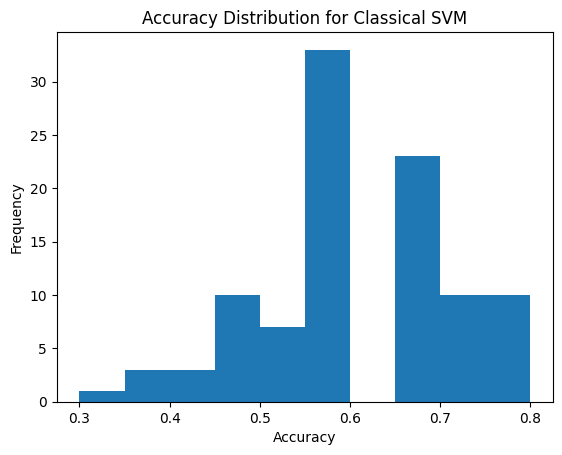

In [19]:
plt.hist(np.array(svc_acc))
plt.title('Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [20]:
print(svc_bacc)
print("For Classical SVM:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc).mean())
print("Standard deviation:  ", np.array(svc_bacc).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc).max())
svc_avg = np.array(svc_bacc).mean()
svc_min = np.array(svc_bacc).min()
svc_max = np.array(svc_bacc).max()

[0.6263736263736264, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6593406593406593, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.625, 0.5, 0.5, 0.5, 0.8125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
For Classical SVM:
Mean Balanced Accuracy:        0.5072321428571428
Standard deviation:   0.03865366737210387
Minimum Balanced Accuracy:     0.5
Maximum Balanced Accuracy:     0.8125


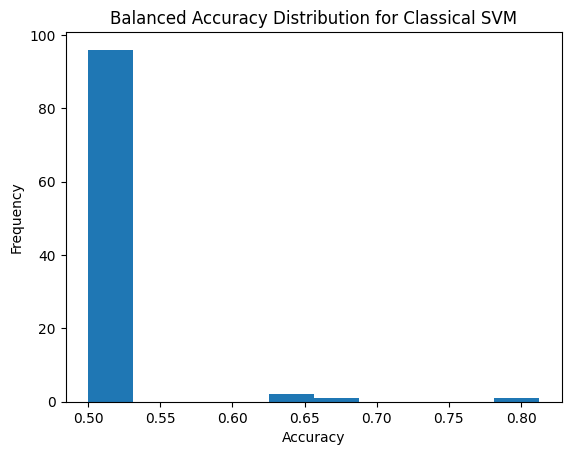

In [21]:
plt.hist(np.array(svc_bacc))
plt.title('Balanced Accuracy Distribution for Classical SVM')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [22]:
from sklearn.tree import DecisionTreeClassifier

svc_acc_dt = []
svc_bacc_dt = []
svc_f1_score_dt = []

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_dt(X_train, X_test, y_train, y_test)
    svc_acc_dt.append(accuracy_svm)
    svc_bacc_dt.append(balanced_accuracy_svm)
    svc_f1_score_dt.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"-----------------------------------------------------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.8, 0.7472527472527473, 0.8571428571428571
-----------------------------------------------------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.9, 0.898989898989899, 0.9090909090909091
-----------------------------------------------------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.95, 0.9583333333333333, 0.9565217391304348
-----------------------------------------------------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.65, 0.625, 0.7199999999999999
-----------------------------------------------------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM:

In [23]:
print(svc_acc_dt)
print("For Classical Decision Tree:")
print("Mean Accuracy:       ", np.array(svc_acc_dt).mean())
print("Standard deviation:  ", np.array(svc_acc_dt).std())
print("Minimum Accuracy:    ", np.array(svc_acc_dt).min())
print("Maximum Accuracy:    ", np.array(svc_acc_dt).max())
svc_avg = np.array(svc_acc_dt).mean()
svc_min = np.array(svc_acc_dt).min()
svc_max = np.array(svc_acc_dt).max()

[0.8, 0.9, 0.95, 0.65, 0.8, 1.0, 0.7, 0.65, 0.85, 0.95, 0.8, 0.95, 0.8, 0.95, 0.85, 1.0, 0.65, 0.8, 0.85, 0.85, 0.85, 0.85, 0.7, 0.8, 0.75, 0.9, 0.75, 0.95, 0.75, 0.8, 0.95, 0.8, 0.7, 0.9, 0.85, 0.8, 0.85, 0.95, 0.9, 0.75, 0.85, 0.8, 0.8, 0.75, 0.75, 0.7, 0.9, 0.85, 0.8, 0.75, 0.85, 0.75, 0.9, 0.7, 0.9, 0.85, 0.65, 0.75, 0.85, 0.95, 0.9, 0.75, 0.9, 0.85, 0.95, 0.75, 0.9, 0.9, 0.75, 0.95, 0.9, 0.85, 0.95, 0.65, 0.9, 1.0, 0.75, 0.8, 0.65, 0.8, 0.75, 0.9, 0.9, 0.85, 0.85, 0.8, 0.9, 0.65, 0.75, 0.65, 1.0, 0.8, 0.9, 0.75, 0.85, 0.8, 0.85, 0.9, 0.8, 0.85]
For Classical Decision Tree:
Mean Accuracy:        0.8274999999999999
Standard deviation:   0.09120718173477349
Minimum Accuracy:     0.65
Maximum Accuracy:     1.0


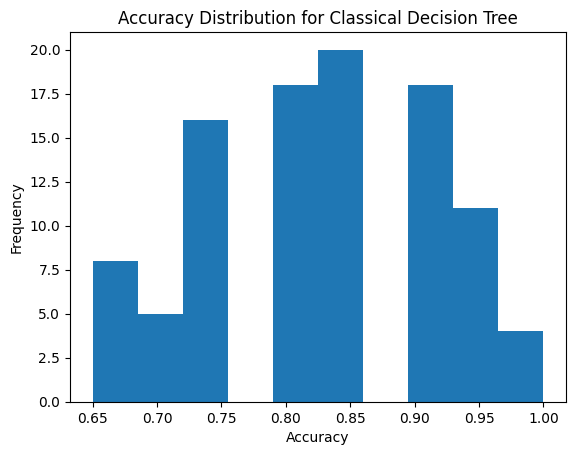

In [24]:
plt.hist(np.array(svc_acc_dt))
plt.title('Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

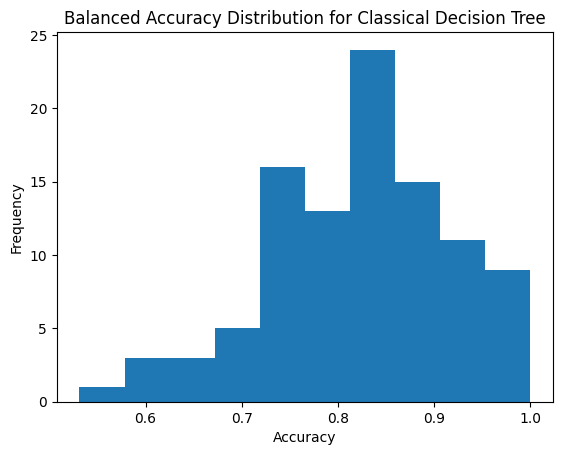

In [25]:
plt.hist(np.array(svc_bacc_dt))
plt.title('Balanced Accuracy Distribution for Classical Decision Tree')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [26]:
from sklearn.ensemble import RandomForestClassifier

svc_acc_rf = []
svc_bacc_rf = []
svc_f1_score_rf = []
total_time_elapsed = 0

for current_iter in range(NUM_OF_EXPERIMENTS):

    print(f"Current experiment no: {current_iter+1}")

    X_train, X_test, y_train, y_test = data[current_iter][0], data[current_iter][1], data[current_iter][2], data[current_iter][3]

    accuracy_svm, balanced_accuracy_svm, classical_f1_score = find_classical_accuracy_rf(X_train, X_test, y_train, y_test)
    svc_acc_rf.append(accuracy_svm)
    svc_bacc_rf.append(balanced_accuracy_svm)
    svc_f1_score_rf.append(classical_f1_score)

    print(f"Accuracy, Balanced Accuracy and F1 Score Classical SVM: {accuracy_svm}, {balanced_accuracy_svm}, {classical_f1_score}")

    print(f"----------------------------------------------------------------")

Current experiment no: 1
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.85, 0.8186813186813187, 0.888888888888889
----------------------------------------------------------------
Current experiment no: 2
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.95, 0.9444444444444444, 0.9565217391304348
----------------------------------------------------------------
Current experiment no: 3
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.95, 0.9583333333333333, 0.9565217391304348
----------------------------------------------------------------
Current experiment no: 4
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.85, 0.8541666666666667, 0.8695652173913043
----------------------------------------------------------------
Current experiment no: 5
Accuracy, Balanced Accuracy and F1 Score Classical SVM: 0.95, 0.9615384615384616, 0.9600000000000001
----------------------------------------------------------------
Current experiment no: 6
Accuracy, Balanced Ac

In [27]:
print(svc_acc_rf)
print("For Classical SVM:")
print("Mean Accuracy:       ", np.array(svc_acc_rf).mean())
print("Standard deviation:  ", np.array(svc_acc_rf).std())
print("Minimum Accuracy:    ", np.array(svc_acc_rf).min())
print("Maximum Accuracy:    ", np.array(svc_acc_rf).max())
svc_avg = np.array(svc_acc_rf).mean()
svc_min = np.array(svc_acc_rf).min()
svc_max = np.array(svc_acc_rf).max()

[0.85, 0.95, 0.95, 0.85, 0.95, 1.0, 0.85, 0.8, 0.9, 0.95, 0.75, 0.95, 0.85, 0.9, 0.95, 0.95, 0.8, 0.8, 0.85, 0.9, 0.9, 0.95, 0.9, 0.9, 0.75, 0.9, 0.85, 0.9, 0.85, 0.8, 0.95, 0.95, 0.75, 0.85, 0.85, 0.95, 0.8, 1.0, 0.9, 0.8, 0.95, 0.85, 0.95, 0.8, 0.85, 0.8, 1.0, 0.9, 0.85, 0.9, 0.9, 0.8, 0.85, 0.95, 0.9, 0.8, 0.8, 0.8, 0.9, 0.9, 0.95, 0.85, 0.9, 0.95, 0.9, 0.95, 0.85, 0.85, 0.95, 0.9, 1.0, 0.85, 0.95, 0.75, 0.95, 1.0, 0.9, 0.9, 0.75, 0.9, 0.95, 1.0, 1.0, 0.9, 0.9, 0.8, 0.9, 0.85, 0.85, 0.85, 0.95, 0.9, 0.85, 0.8, 0.8, 0.85, 0.9, 1.0, 0.8, 0.9]
For Classical SVM:
Mean Accuracy:        0.8845000000000001
Standard deviation:   0.06621744483140374
Minimum Accuracy:     0.75
Maximum Accuracy:     1.0


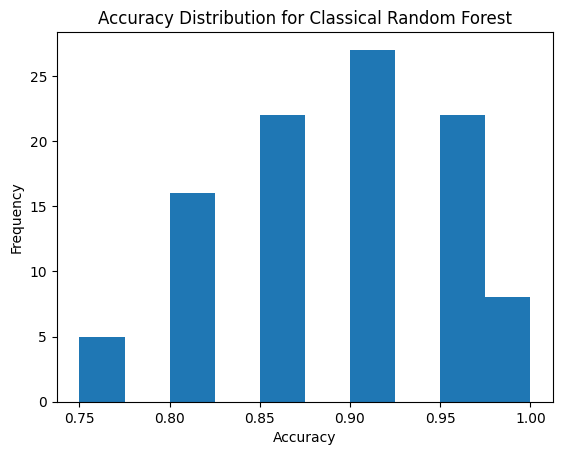

In [28]:
plt.hist(np.array(svc_acc_rf))
plt.title('Accuracy Distribution for Classical Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [29]:
print(svc_bacc_rf)
print("For Classical Random Forest:")
print("Mean Balanced Accuracy:       ", np.array(svc_bacc_rf).mean())
print("Standard deviation:  ", np.array(svc_bacc_rf).std())
print("Minimum Balanced Accuracy:    ", np.array(svc_bacc_rf).min())
print("Maximum Balanced Accuracy:    ", np.array(svc_bacc_rf).max())
svc_avg = np.array(svc_bacc_rf).mean()
svc_min = np.array(svc_bacc_rf).min()
svc_max = np.array(svc_bacc_rf).max()

[0.8186813186813187, 0.9444444444444444, 0.9583333333333333, 0.8541666666666667, 0.9615384615384616, 1.0, 0.7976190476190477, 0.7878787878787878, 0.8888888888888888, 0.9583333333333333, 0.75, 0.95, 0.7976190476190477, 0.8571428571428572, 0.9583333333333333, 0.9615384615384616, 0.7472527472527473, 0.7802197802197802, 0.8535353535353536, 0.8571428571428572, 0.9333333333333333, 0.9444444444444444, 0.84375, 0.9285714285714286, 0.7291666666666667, 0.9166666666666667, 0.8186813186813187, 0.875, 0.8186813186813187, 0.78125, 0.9642857142857143, 0.9615384615384616, 0.8076923076923077, 0.8333333333333333, 0.8186813186813187, 0.9375, 0.7916666666666667, 1.0, 0.8888888888888888, 0.8, 0.9166666666666667, 0.8535353535353536, 0.9545454545454546, 0.7802197802197802, 0.7857142857142857, 0.8, 1.0, 0.8901098901098901, 0.8535353535353536, 0.8333333333333333, 0.8958333333333333, 0.7708333333333333, 0.8434343434343434, 0.9375, 0.8888888888888888, 0.7472527472527473, 0.875, 0.7619047619047619, 0.898989898989

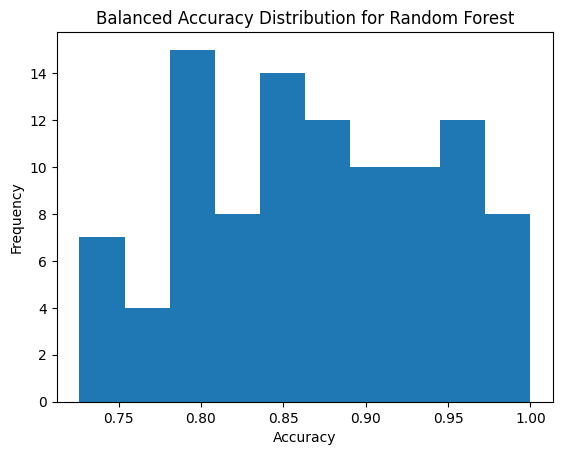

In [30]:
plt.hist(np.array(svc_bacc_rf))
plt.title('Balanced Accuracy Distribution for Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Frequency');

In [31]:
def find_closest_to_mean(arr):
    mean = sum(arr) / len(arr)  # Calculate mean of the list

    # Calculate the differences between each element and the mean, and store them in a tuple with their index
    diff_indices = [(abs(x - mean), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [32]:
def find_closest_to_max(arr):
    max_val = max(arr)  # Calculate max of the list

    # Calculate the differences between each element and the max, and store them in a tuple with their index
    diff_indices = [(abs(x - max_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [33]:
def find_closest_to_min(arr):
    min_val = min(arr)  # Calculate min of the list

    # Calculate the differences between each element and the min, and store them in a tuple with their index
    diff_indices = [(abs(x - min_val), i) for i, x in enumerate(arr)]

    # Sort the tuple by the difference values
    sorted_diff_indices = sorted(diff_indices)

    # Extract the indices of the two closest values
    index1 = sorted_diff_indices[0][1]
    index2 = sorted_diff_indices[1][1]
    return [index1, index2]

In [34]:
fm_list = []
names_fm = []
def create_feature_maps(features_):
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'ZZ'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z ZZ')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'YY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z YY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Y', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Y XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['X', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('X XY')
    feature_map = PauliFeatureMap(features_, reps=2, paulis=['Z', 'XY'], entanglement="linear")
    fm_list.append(feature_map)
    names_fm.append('Z XY')


In [35]:
create_feature_maps(7)

In [36]:
def train_and_fit_model(x_train_, x_test_, y_train_, y_test_, fm_):

    start = time.time()

    # Building Kernel
    dse_feature_map = fm_

    dse_backend = QuantumInstance(
        Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=12345, seed_transpiler=12345
    )

    dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
    qsvc = QSVC(quantum_kernel=dse_kernel)
    qsvc.fit(x_train_, y_train_)

    # Predict the labels
    labels_test = qsvc.predict(x_test_)

    accuracy_test = metrics.accuracy_score(y_true=y_test_, y_pred=labels_test)
    ba_score = metrics.balanced_accuracy_score(y_true=y_test_, y_pred=labels_test)
    q_f1_score = f1_score(y_test_, labels_test)

    elapsed = time.time() - start

    return accuracy_test, ba_score, q_f1_score, elapsed

In [37]:
! pip install qiskit-aer

In [38]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.utils import QuantumInstance

In [39]:
print("For Mean Performance: ")
indices_mean = find_closest_to_mean(svc_bacc)
print(indices_mean)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_mean:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

For Mean Performance: 
[1, 2]


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.6212121212121212, 0.7407407407407406, 28.22680163383484


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.6041666666666667, 0.7407407407407408, 24.440735340118408


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.45, 0.4292929292929293, 0.56, 32.668859004974365


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5625, 0.7741935483870968, 31.127952337265015


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5303030303030303, 0.64, 31.69720220565796


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5416666666666667, 0.7142857142857143, 32.221155405044556


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5, 0.7096774193548387, 37.09739637374878


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5, 0.7499999999999999, 36.28596210479736


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5303030303030303, 0.64, 35.016833782196045


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5416666666666667, 0.7142857142857143, 35.545976638793945


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5, 0.7096774193548387, 38.48853826522827


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5, 0.7499999999999999, 38.89192581176758


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.45454545454545453, 0.6666666666666666, 42.09937620162964


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5625, 0.7741935483870968, 40.57149410247803


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5, 0.7096774193548387, 43.43381404876709


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5833333333333333, 0.7586206896551724, 45.770825147628784


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.45454545454545453, 0.6666666666666666, 40.33565163612366


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5625, 0.7741935483870968, 41.00191903114319


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.51010101010101, 0.6896551724137931, 47.38309860229492


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5, 0.7499999999999999, 48.75256133079529


Averge Balanced Accuracy for SVM: 0.5
Average Accuracy for SVM: 0.5999999999999999
Average F1 Score for SVM: 0.7499999999999999


Averge Balanced Accuracy for Decision Tree: 0.9583333333333333
Average Accuracy for Pauli Decision Tree: 0.95
Average F1 Score for Pauli Decision Tree: 0.9565217391304348


Averge Balanced Accuracy for Random Forest: 0.9583333333333333
Average Accuracy for Pauli Random Forest: 0.95
Average F1 Score for Pauli Random Forest: 0.9565217391304348


Averge Balanced Accuracy for Pauli Z: 0.612689393939394
Average Accuracy for Pauli Z: 0.65
Average F1 Score for Pauli Z: 0.7407407407407407


Averge Balanced Accuracy for Pauli ZZ: 0.49589646464646464
Average Accuracy for Pauli ZZ: 0.55
Average F1 Score for Pauli ZZ: 0.6670967741935484


Averge Balanced Accuracy for Pauli YY: 0.5359848484848485
Average Accuracy for Pauli YY: 0.575
Average F1 Score for Pauli YY: 0.6771

In [ ]:
print('Oishik')

In [40]:
print("For Min Performance ")
indices_min = find_closest_to_min(svc_bacc)
print(indices_min)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_min:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

For Min Performance 
[1, 2]


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.6212121212121212, 0.7407407407407406, 26.704378128051758


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.6041666666666667, 0.7407407407407408, 26.315429210662842


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.45, 0.4292929292929293, 0.56, 33.51861381530762


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5625, 0.7741935483870968, 33.43532586097717


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5303030303030303, 0.64, 32.8627712726593


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5416666666666667, 0.7142857142857143, 33.99775171279907


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5, 0.7096774193548387, 41.612727880477905


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5, 0.7499999999999999, 41.64528799057007


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5303030303030303, 0.64, 40.202014207839966


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5416666666666667, 0.7142857142857143, 41.01352286338806


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5, 0.7096774193548387, 43.50590968132019


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5, 0.7499999999999999, 40.300076723098755


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.45454545454545453, 0.6666666666666666, 42.93935251235962


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5625, 0.7741935483870968, 43.5361807346344


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.5, 0.7096774193548387, 43.96479892730713


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5833333333333333, 0.7586206896551724, 45.41428542137146


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.45454545454545453, 0.6666666666666666, 39.71988391876221


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.5625, 0.7741935483870968, 42.078484535217285


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.51010101010101, 0.6896551724137931, 44.32595992088318


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.6, 0.5, 0.7499999999999999, 43.52688765525818


Averge Balanced Accuracy for SVM: 0.5
Average Accuracy for SVM: 0.5999999999999999
Average F1 Score for SVM: 0.7499999999999999


Averge Balanced Accuracy for Decision Tree: 0.9583333333333333
Average Accuracy for Pauli Decision Tree: 0.95
Average F1 Score for Pauli Decision Tree: 0.9565217391304348


Averge Balanced Accuracy for Random Forest: 0.9583333333333333
Average Accuracy for Pauli Random Forest: 0.95
Average F1 Score for Pauli Random Forest: 0.9565217391304348


Averge Balanced Accuracy for Pauli Z: 0.612689393939394
Average Accuracy for Pauli Z: 0.65
Average F1 Score for Pauli Z: 0.7407407407407407


Averge Balanced Accuracy for Pauli ZZ: 0.49589646464646464
Average Accuracy for Pauli ZZ: 0.55
Average F1 Score for Pauli ZZ: 0.6670967741935484


Averge Balanced Accuracy for Pauli YY: 0.5359848484848485
Average Accuracy for Pauli YY: 0.575
Average F1 Score for Pauli YY: 0.6771

In [41]:
print("For Max Performance ")
indices_max = find_closest_to_max(svc_bacc)
print(indices_max)

q_ba, q_a, q_f1 = [], [], []
svc_ba, svc_a, svc_f1 = [], [], []
dt_ba, dt_a, dt_f1 = [], [], []
rf_ba, rf_a, rf_f1 = [], [], []

for fm in fm_list:
    qba, qa, qf = [], [], []
    for idx in indices_max:
        X_train, X_test, y_train, y_test = data[idx]
        acc, bacc, f1, elapsed = train_and_fit_model(X_train, X_test, y_train, y_test, fm)
        print(f"Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: {acc}, {bacc}, {f1}, {elapsed}")
        qba.append(bacc)
        qa.append(acc)
        qf.append(f1)
    q_ba.append(qba)
    q_a.append(qa)
    q_f1.append(qf)
    svc_ba.append(svc_bacc[idx])
    svc_a.append(svc_acc[idx])
    svc_f1.append(svc_f1_score[idx])
    dt_ba.append(svc_bacc_dt[idx])
    dt_a.append(svc_acc_dt[idx])
    dt_f1.append(svc_f1_score_dt[idx])
    rf_ba.append(svc_bacc_rf[idx])
    rf_a.append(svc_acc_rf[idx])
    rf_f1.append(svc_f1_score_rf[idx])

print("\n")
print(f"Averge Balanced Accuracy for SVM: {sum(svc_ba)/len(svc_ba)}")
print(f"Average Accuracy for SVM: {sum(svc_a)/len(svc_a)}")
print(f"Average F1 Score for SVM: {sum(svc_f1)/len(svc_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Decision Tree: {sum(dt_ba)/len(dt_ba)}")
print(f"Average Accuracy for Pauli Decision Tree: {sum(dt_a)/len(dt_a)}")
print(f"Average F1 Score for Pauli Decision Tree: {sum(dt_f1)/len(dt_f1)}")
print("\n");
print(f"Averge Balanced Accuracy for Random Forest: {sum(rf_ba)/len(rf_ba)}")
print(f"Average Accuracy for Pauli Random Forest: {sum(rf_a)/len(rf_a)}")
print(f"Average F1 Score for Pauli Random Forest: {sum(rf_f1)/len(rf_f1)}")
print("\n");
for i in range(len(fm_list)):
    print(f"Averge Balanced Accuracy for Pauli {names_fm[i]}: {sum(q_ba[i])/len(q_ba[i])}")
    print(f"Average Accuracy for Pauli {names_fm[i]}: {sum(q_a[i])/len(q_a[i])}")
    print(f"Average F1 Score for Pauli {names_fm[i]}: {sum(q_f1[i])/len(q_f1[i])}")
    print("\n")

For Max Performance 
[29, 16]


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.59375, 0.7586206896551724, 27.358265161514282


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.75, 0.7417582417582418, 0.8, 26.738664627075195


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.4, 0.4375, 0.5, 30.94713521003723


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.45, 0.510989010989011, 0.42105263157894735, 31.889187812805176


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.75, 0.75, 0.8275862068965517, 31.2934889793396


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.48351648351648346, 0.5833333333333334, 32.90112352371216


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.7, 0.625, 0.7999999999999999, 38.67990517616272


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.6208791208791209, 0.5263157894736842, 38.406434297561646


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.75, 0.75, 0.8275862068965517, 37.27830767631531


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.48351648351648346, 0.5833333333333334, 38.462947607040405


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.55, 0.53125, 0.6666666666666666, 41.701977491378784


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.45, 0.3791208791208791, 0.5925925925925927, 39.98059129714966


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.75, 0.84375, 0.8148148148148148, 44.16584062576294


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.4, 0.43956043956043955, 0.4, 44.229371786117554


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.40625, 0.6428571428571429, 48.46199631690979


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.6318681318681318, 0.7199999999999999, 48.03278303146362


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.4, 0.4375, 0.5, 41.756866216659546


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.35, 0.30219780219780223, 0.48000000000000004, 41.60003662109375


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.65, 0.59375, 0.7586206896551724, 46.40016007423401


/tmp/ipykernel_191/3124786454.py:8: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  dse_backend = QuantumInstance(


Accuracy, Balanced Accuracy, F1 Score, Elapsed Time: 0.5, 0.45054945054945056, 0.6153846153846154, 43.92847466468811


Averge Balanced Accuracy for SVM: 0.6593406593406594
Average Accuracy for SVM: 0.5999999999999999
Average F1 Score for SVM: 0.5999999999999999


Averge Balanced Accuracy for Decision Tree: 0.5989010989010988
Average Accuracy for Pauli Decision Tree: 0.6500000000000001
Average F1 Score for Pauli Decision Tree: 0.7407407407407407


Averge Balanced Accuracy for Random Forest: 0.7472527472527473
Average Accuracy for Pauli Random Forest: 0.7999999999999999
Average F1 Score for Pauli Random Forest: 0.857142857142857


Averge Balanced Accuracy for Pauli Z: 0.6677541208791209
Average Accuracy for Pauli Z: 0.7
Average F1 Score for Pauli Z: 0.7793103448275862


Averge Balanced Accuracy for Pauli ZZ: 0.4742445054945055
Average Accuracy for Pauli ZZ: 0.42500000000000004
Average F1 Score for Pauli ZZ: 0.4605263157894737


Averge Balanced Accuracy for Pauli YY: 0.6167582417582418
Av

In [ ]:
from qiskit import *

In [ ]:
IBMQ.load_account()

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

In [ ]:
print("Using 3 features Price, Open, High: ")
sz = []
svm_acc = []
qsvm_acc = []
for data_size in range(20, 80, 10):
    print("for size", data_size)
    sz.append(data_size)
    x = df.iloc[:data_size, 0:-1]
    y = df.iloc[:data_size, -1]
    # spltting the dataset into train and test set
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)
    from sklearn import svm
    svc_clf = svm.SVC(random_state = 7)
    svc_clf.fit(x_train, y_train)
    svc_score = svc_clf.score(x_test, y_test)
    print(f"svm classification score: {svc_score}")
    svm_acc.append(svc_score)
    import qiskit
    import matplotlib.pyplot as plt
    import numpy as np

    from sklearn.svm import SVC
    from sklearn.cluster import SpectralClustering
    from sklearn.metrics import normalized_mutual_info_score

    from qiskit import BasicAer
    from qiskit.circuit.library import ZZFeatureMap
    from qiskit.utils import QuantumInstance, algorithm_globals
    from qiskit_machine_learning.algorithms import QSVC
    from qiskit_machine_learning.kernels import QuantumKernel
    from qiskit_machine_learning.datasets import ad_hoc_data

    seed = 12345
    algorithm_globals.random_seed = seed
    # Building Kernel
    dse_feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement="linear")

    dse_backend = QuantumInstance(
        BasicAer.get_backend('qasm_simulator'), shots=1024, seed_simulator=seed, seed_transpiler=seed
    )

    dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
    dse_svc = SVC(kernel=dse_kernel.evaluate)
    dse_svc.fit(x_train, y_train)
    dse_score = dse_svc.score(x_test, y_test)

    print(f"qsvm classification test score: {dse_score}")
    qsvm_acc.append(dse_score)

In [ ]:
import random
total = 50
for cnt in range(total):
    for idx in range(len(sz)):
        data_size = sz[idx]
        print("for size", data_size)
        st = random.randint(0, 200-data_size)
        x = df.iloc[st:st+data_size, 0:-1]
        y = df.iloc[st:st+data_size, -1]
        # spltting the dataset into train and test set
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)
        from sklearn import svm
        svc_clf = svm.SVC(random_state = 7)
        svc_clf.fit(x_train, y_train)
        svc_score = svc_clf.score(x_test, y_test)
        print(f"svm classification score: {svc_score}")
        svm_acc[idx] = svm_acc[idx] + svc_score
        import qiskit
        import matplotlib.pyplot as plt
        import numpy as np

        from sklearn.svm import SVC
        from sklearn.cluster import SpectralClustering
        from sklearn.metrics import normalized_mutual_info_score

        from qiskit import BasicAer
        from qiskit.circuit.library import ZZFeatureMap
        from qiskit.utils import QuantumInstance, algorithm_globals
        from qiskit_machine_learning.algorithms import QSVC
        from qiskit_machine_learning.kernels import QuantumKernel
        from qiskit_machine_learning.datasets import ad_hoc_data

        seed = 12345
        algorithm_globals.random_seed = seed
        # Building Kernel
        dse_feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement="linear")

        dse_backend = QuantumInstance(
            BasicAer.get_backend('qasm_simulator'), shots=1024, seed_simulator=seed, seed_transpiler=seed
        )

        dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
        dse_svc = SVC(kernel=dse_kernel.evaluate)
        dse_svc.fit(x_train, y_train)
        dse_score = dse_svc.score(x_test, y_test)

        print(f"qsvm classification test score: {dse_score}")
        qsvm_acc[idx] = qsvm_acc[idx] + dse_score

In [ ]:
print(svm_acc)
print(qsvm_acc)

In [ ]:
print(svm_acc)
print(qsvm_acc)

In [ ]:
for idx in range(len(sz)):
    print(idx, svm_acc[idx]/32, '\t\t', qsvm_acc[idx]/32)

In [ ]:
sz = [20, 30, 40, 50, 60]
svm_acc = [0.5, 0.8333333333333334, 0.75, 0.7, 0.5]
qsvm_acc = [.25, .5, .25, .6, 0.4166666666666667]
import random
total = 32
for cnt in range(total):
    print("current iteration: ", cnt)
    for idx in range(len(sz)):
        data_size = sz[idx]
        print("for size", data_size)
        st = random.randint(0, 200-data_size)
        x = df.iloc[st:st+data_size, 0:-1]
        y = df.iloc[st:st+data_size, -1]
        # spltting the dataset into train and test set
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)
        from sklearn import svm
        svc_clf = svm.SVC(random_state = 7)
        svc_clf.fit(x_train, y_train)
        svc_score = svc_clf.score(x_test, y_test)
        print(f"svm classification score: {svc_score}")
        svm_acc[idx] = svm_acc[idx] + svc_score
        import qiskit
        import matplotlib.pyplot as plt
        import numpy as np

        from sklearn.svm import SVC
        from sklearn.cluster import SpectralClustering
        from sklearn.metrics import normalized_mutual_info_score

        from qiskit import BasicAer
        from qiskit.circuit.library import ZZFeatureMap
        from qiskit.utils import QuantumInstance, algorithm_globals
        from qiskit_machine_learning.algorithms import QSVC
        from qiskit_machine_learning.kernels import QuantumKernel
        from qiskit_machine_learning.datasets import ad_hoc_data

        seed = 12345
        algorithm_globals.random_seed = seed
        # Building Kernel
        dse_feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement="linear")

        dse_backend = QuantumInstance(
            BasicAer.get_backend('qasm_simulator'), shots=1024, seed_simulator=seed, seed_transpiler=seed
        )

        dse_kernel = QuantumKernel(feature_map=dse_feature_map, quantum_instance=dse_backend)
        dse_svc = SVC(kernel=dse_kernel.evaluate)
        dse_svc.fit(x_train, y_train)
        dse_score = dse_svc.score(x_test, y_test)

        print(f"qsvm classification test score: {dse_score}")
        qsvm_acc[idx] = qsvm_acc[idx] + dse_score
    print("=============================================")

In [ ]:
print(svm_acc, qsvm_acc)

In [ ]:
for idx in range(len(sz)):
    print(idx, svm_acc[idx]/32, '\t\t', qsvm_acc[idx]/32)